<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/RNCavanzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [2]:
# se carga la base de datos disponbile y se normalizan
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#se realiza la expanción de dimensiones porque los datos son en escala de b y n
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [4]:
def advanced_model():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [5]:
model = advanced_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 88s 46ms/step - loss: 0.2431 - accuracy: 0.9238 - val_loss: 0.0442 - val_accuracy: 0.9859
Epoch 2/5
1875/1875 [==============================] - 80s 42ms/step - loss: 0.1010 - accuracy: 0.9696 - val_loss: 0.0386 - val_accuracy: 0.9879
Epoch 3/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0790 - accuracy: 0.9767 - val_loss: 0.0359 - val_accuracy: 0.9879
Epoch 4/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0703 - accuracy: 0.9796 - val_loss: 0.0256 - val_accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0645 - accuracy: 0.9807 - val_loss: 0.0253 - val_accuracy: 0.9915


313/313 [==============================] - 8s 23ms/step


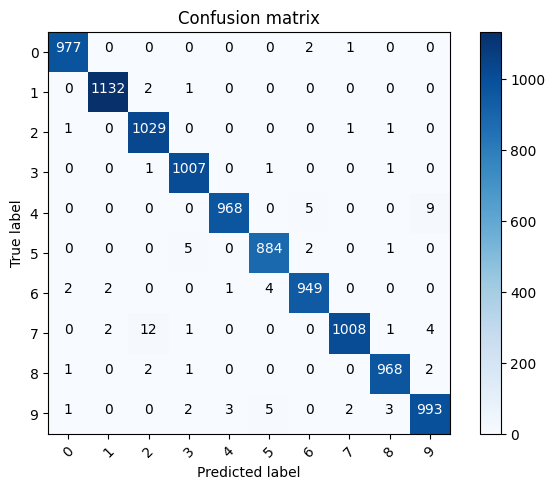

In [6]:
#matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(x_test)
confusion_mtx = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
plot_confusion_matrix(confusion_mtx, classes=range(10))

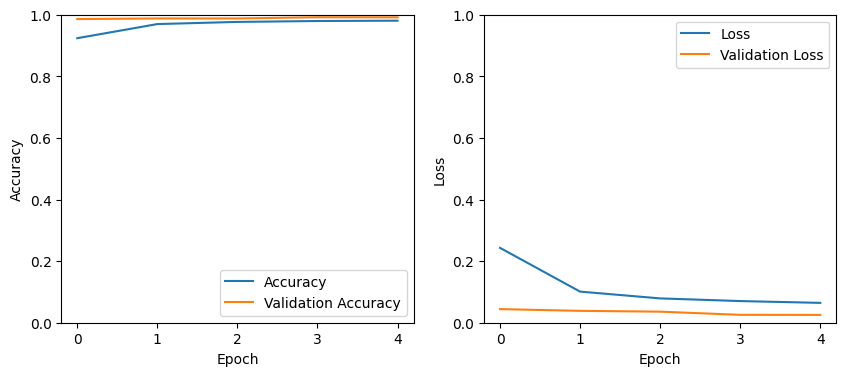

In [7]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()